In [1]:
import os
%pylab inline
import numpy as np
import pyccl as ccl
from scipy.stats import norm
import pickle 
import DifferentiableHOS as DHOS
import jax_cosmo as jc

Populating the interactive namespace from numpy and matplotlib


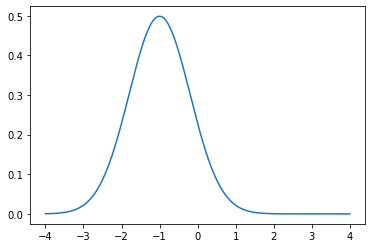

In [2]:
x_axis = np.arange(-4, 4, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,-1,0.8))
plt.show()

In [3]:
l = np.logspace(2,np.log10(3_000))

In [4]:
cosmo_ccl = ccl.Cosmology(
    Omega_c=0.2589, Omega_b=0.0486, 
    h=0.6774, sigma8 = 0.8159, n_s=0.9667, Neff=0,w0=1.5,
    transfer_function='eisenstein_hu', matter_power_spectrum='halofit')

In [5]:
z_source=0.913446 

In [6]:
z = linspace(0,2,2048)
pz=norm.pdf(z,loc=z_source,scale=0.03)


In [7]:
tracers= ccl.WeakLensingTracer(cosmo_ccl, (z ,pz),use_A_ia=False )
cl=ccl.angular_cl(cosmo_ccl, tracers, tracers, l)

In [8]:
cosmo=jc.Planck15(Omega_b=0.0486,Omega_c=0.2589, Omega_k=0,n_s=0.9667, sigma8=0.8159, w0=1.5, wa=0.0)
z = linspace(0,2,1024)
nz=[jc.redshift.delta_nz(0.91)]
probes=[ jc.probes.WeakLensing(nz, sigma_e=0.26)]
cls = jc.angular_cl.angular_cl(cosmo, l, probes)

/global/homes/d/dlan/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:5293: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


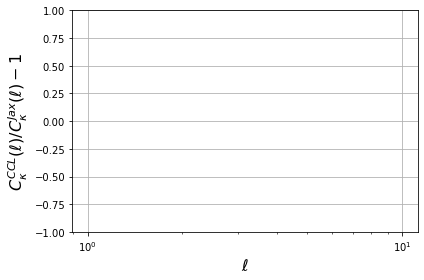

In [9]:
fig, ax = plt.subplots()
plt.semilogx(l,cl/cls[0]-1)
plt.grid(True)
#xlim(3e2,3e3)
ylim(-1,1)
ylabel('$C_{\kappa}^{CCL}(\ell)/C_{\kappa}^{Jax}(\ell)-1$',fontsize=16)
xlabel('$\ell$',fontsize=16)
#legend(fontsize='large',ncol=3,loc='upper right')
plt.tight_layout()
#plt.savefig('../figures/res_cls_DLL_vs_ktng.pdf',bbox_inches='tight')



In [10]:
cls[0]

DeviceArray([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
             nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
             nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
             nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
             nan, nan], dtype=float32)

In [11]:
jc.background.f_de??

Signature: jc.background.f_de(cosmo, a)
Docstring:
Evolution parameter for the Dark Energy density.

Parameters
----------
a : array_like
    Scale factor

Returns
-------
f : ndarray, or float if input scalar
    The evolution parameter of the Dark Energy density as a function
    of scale factor

Notes
-----

For a given parametrisation of the Dark Energy equation of state,
the scaling of the Dark Energy density with time can be written as:

.. math::

    \rho_{de}(a) \propto a^{f(a)}

(see :cite:`2005:Percival`) where :math:`f(a)` is computed as
:math:`f(a) = \frac{-3}{\ln(a)} \int_0^{\ln(a)} [1 + w(a^\prime)]
d \ln(a^\prime)`. In the case of Linder's parametrisation for the
dark energy in Eq. :eq:`linderParam` :math:`f(a)` becomes:

.. math::

    f(a) = -3(1 + w_0) + 3 w \left[ \frac{a - 1}{ \ln(a) } - 1 \right]
    
Source:   
def f_de(cosmo, a):
    r"""Evolution parameter for the Dark Energy density.

    Parameters
    ----------
    a : array_like
        Scale factor

    R